# Personal Information
Name: **Matteo Rapa**

StudentID: **1444991**

Email: [**matteo.rapa@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **19.03.2023**

Github: https://github.com/matteorapa/msc-thesis-self-adaptive-neural-networks

# Data Context

ImageNet is an image dataset organized according to the WordNet hierarchy. Each meaningful concept in WordNet, possibly described by multiple words or word phrases, is called a "synonym set" or "synset". There are more than 100,000 synsets in WordNet; the majority of them are nouns (80,000+). In ImageNet, we aim to provide on average 1000 images to illustrate each synset. Images of each concept are quality-controlled and human-annotated. In its completion, we hope ImageNet will offer tens of millions of cleanly labeled and sorted images for most of the concepts in the WordNet hierarchy.

Russakovsky, O., Deng, J., Su, H. et al. ImageNet Large Scale Visual Recognition Challenge. Int J Comput Vis 115, 211–252 (2015). https://doi.org/10.1007/s11263-015-0816-y

# Data Description

The ImageNet dataset is a large-scale image classification dataset containing over 14 million images distributed across 1,000 different classes. In this exploratory data analysis (EDA), we will analyze various aspects of the dataset to gain insights into its structure and properties.

Data Size and Structure:
First, we need to understand the size and structure of the dataset. The ImageNet dataset has two main components: the training set and the validation set. The training set contains over 1.2 million images, while the validation set contains over 50,000 images. Each image in the dataset is labeled with one of 1,000 possible categories.

In [9]:
# Import the packages

import os
import numpy as np
import pandas as pd
import pickle

### Data Loading

**Image Resolution**

In this exploratory data analysis, a downsampled version of the ImageNet dataset will be used, which is formatted similar to the CIFAR10 dataset. The images are downsampled to 64 by 64 resolution while the original dataset has varying resolutions. The following code blocks defines the methods reformat the data so that it may be used, using the *pickle* package.

Patryk Chrabaszcz, Ilya Loshchilov, & Frank Hutter. (2017). A Downsampled Variant of ImageNet as an Alternative to the CIFAR datasets.

In [7]:
# Function to reformated the data files
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

# Function to load the batches of the data from a folder
def load_batch(data_folder, idx, img_size=64):
    data_file = os.path.join(data_folder, 'train_data_batch_')

    d = unpickle(data_file + str(idx))
    x = d['data']
    y = d['labels']
    mean_image = d['mean']

    x = x/np.float32(255)
    mean_image = mean_image/np.float32(255)

    # Labels are indexed from 1, shift it so that indexes start at 0
    y = [i-1 for i in y]
    data_size = x.shape[0]

    x -= mean_image

    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)
    return (x, y)



Loading the data from seperate folders

In [12]:
x, y = load_batch('/kaggle/input/imagenet64/Imagenet64_train_part1', 1, img_size=64)

The dataset contains 10 batches, each containing 128116 images each, for a total over 1.2M images.

In [13]:
print("The features has the following shape", x.shape)

The features has the following shape (128116, 3, 64, 64)


In [16]:
print("Each batch has", len(y), "images.")

Each batch has 128116 images.



Class Distribution:
It is important to understand the distribution of classes in the dataset. We can plot a histogram of the number of images per class to see if there is any class imbalance. However, since Imagenet is a benchmark dataset the classes (1000) are already mostly balanced as shown in the histogram below.

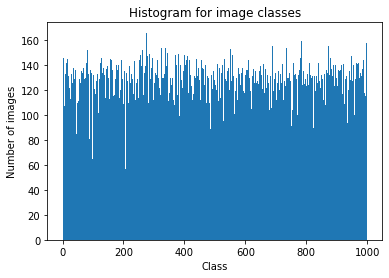

In [19]:
import matplotlib.pyplot as plt

# Generate a histogram of the values in y with 10 bins
plt.hist(y, bins=1000)

# Set the plot title and axis labels
plt.title('Histogram for image classes')
plt.xlabel('Class')
plt.ylabel('Number of images')

# Display the plot
plt.show()

Image Quality:
The quality of the images in the dataset can vary significantly. We can analyze the distribution of image quality, such as brightness, contrast, and color saturation, to see if there are any trends or anomalies.

Image Complexity:
The ImageNet dataset contains images of varying complexity, from simple objects to complex scenes which have a high number of objects in the image, the size of the objects, increasing the clutter in the scene.

The following are some examples of images from the dataset.

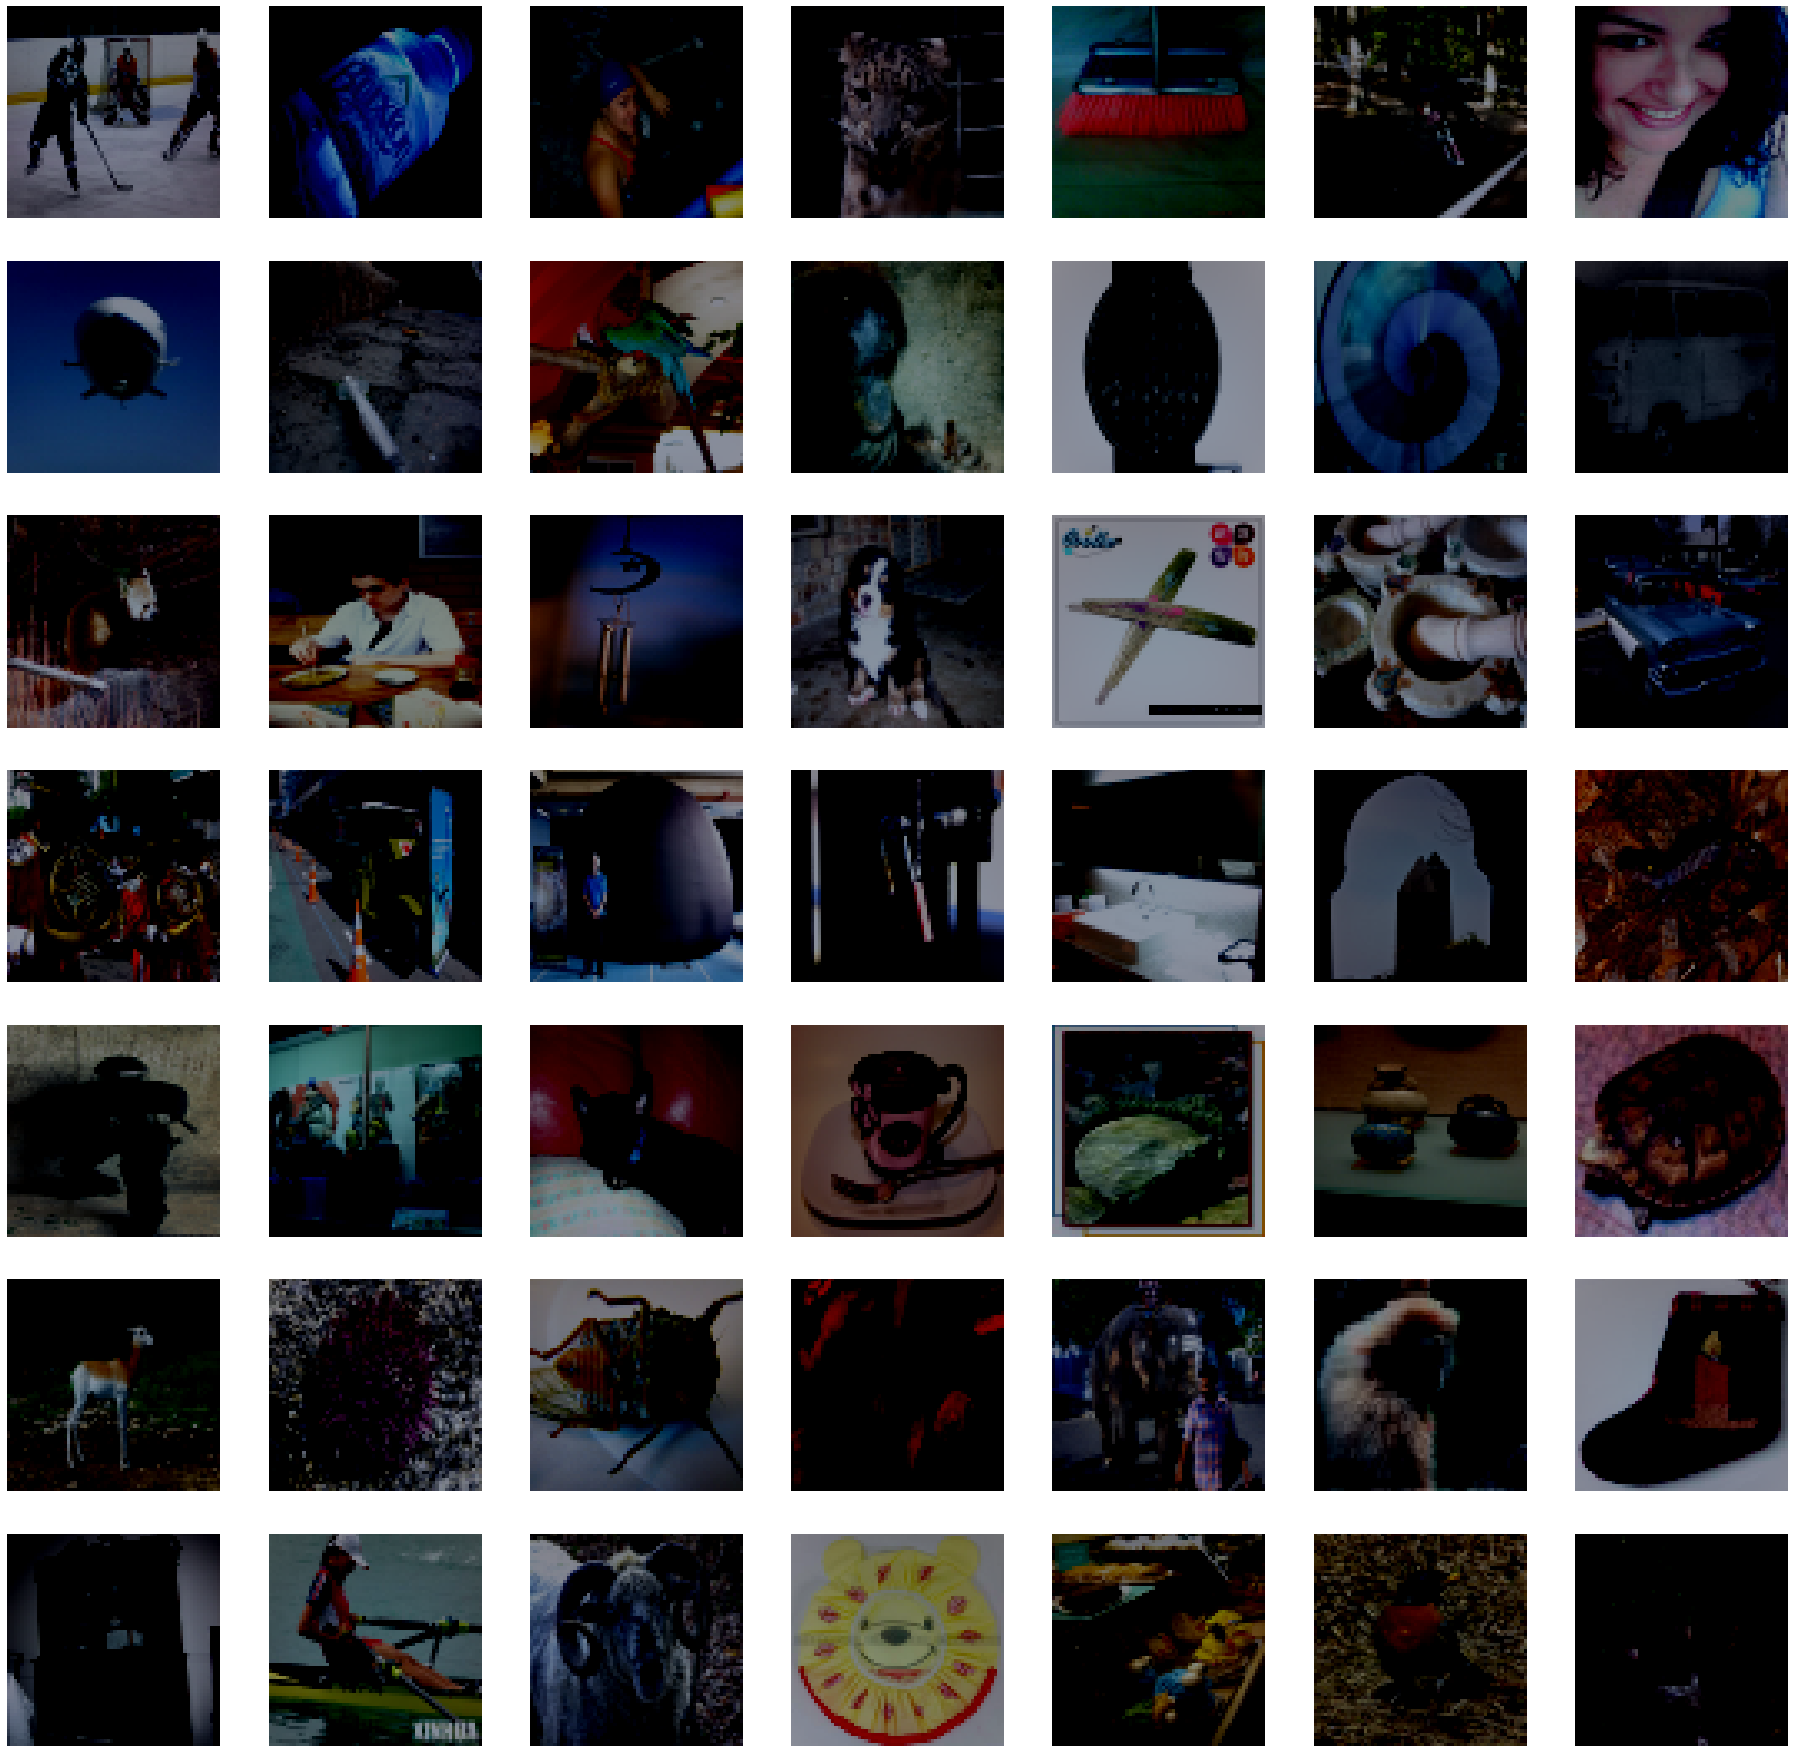

In [44]:


import matplotlib.pyplot as plt


n = 7
fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(32, 32))

for i in range(n*n):
    row_idx = i // n
    col_idx = i % n
    axes[row_idx, col_idx].imshow(x[i].transpose((1, 2, 0)))
    axes[row_idx, col_idx].axis('off')

plt.show()